<span style="color:darkblue; font-family:Arial; font-size: 40px;font-weight:bold;"> &nbsp;&nbsp; Diabetes Care and Readmissions
<span style="text-align:right;color: grey; font-family:Arial; font-size: 12px;">June 2017 Contact: Jennifer Michaels </span>

# Table of contents

* Overview
* Setup:
* [Functions](#functions)
* [Loading packages and data](#loading) and setting working directory

    
    
    
* [Finding rows and columns](#rows)
* [Find mean, max, min, median](#mean) 
* [Find # records by ICD code](#icd)
* [Bar chart of # of records by ICD code](#bar_icd)
* [Scatter chart of # of records by ICD vs sum of claims ($)](#scatter)
* [What else?](#else)

# Overview

This project analyzes the "Diabetes 130-US hospitals" data for years 1999-2008, aiming to duplicate the logistic model results presented in Strack, et al (2014) and see if other models can improve the fit or add insights.


Data Source: https://archive.ics.uci.edu/ml/datasets/diabetes
        <br>
        <br>
Article: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

# Description of Results obtained in paper and data processing done for paper

* Results to obtain
<br>
<br>
Regarding HbA1c fequencies and medication changes: "We examined both the frequency of HbA1c test ordering and the response to its result, which we defined as a change in diabetic medications."
<br>
Regarding HbA1c testing, other features (including interactions) and likelihood of readmission (target variable)

* groups
<br>
<br>
"We considered four groups of encounters: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is greater than 8% with no change in diabetic medications, and (4) HbA1c performed, result is greater than 8%, and diabetic medication was changed."

* weight, payor code, medical specialty :: missing value issues
<br>
<br>
'There were several features that could not be treated directly since they had a high percentage of missing values. These features were weight (97% values missing), payer code (40%), and medical specialty (47%). Weight attribute was considered to be too sparse and it was not included in further analysis. Payer code was removed since it had a high percentage of missing values and it was not considered relevant to the outcome. Medical specialty attribute was maintained, adding the value “missing” in order to account for missing values. '

* multiple rows per patient :: removing encounters
<br>
<br>
"The preliminary dataset contained multiple inpatient visits for some patients and the observations could not be considered as statistically independent, an assumption of the logistic regression model. We thus used only one encounter per patient; in particular, we considered only the first encounter for each patient as the primary admission and determined whether or not they were readmitted within 30 days. Additionally, we removed all encounters that resulted in either discharge to a hospice or patient death, to avoid biasing our analysis. After performing the above-described operations, we were left with 69,984 encounters that constituted the final dataset for analysis."

# Setup

## <font color = 'orange'> Functions <a id='functions'> </a></font>

In [1]:
flagger = lambda x: 1 if x>0 else 0

## <font color='orange'>1.Loading packages and data <a id="loading"></a></font>

### general packages

In [2]:
%matplotlib inline

# Standard Libraries
import os
import re
##import memory_profiler
import timeit
import pandas as pd
#import pyodbc
from datetime import datetime, timedelta
import numpy as np
import copy

# Specific to this project
import getpass


# Other
import math

# Visualization
import matplotlib.pyplot as plt


In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import     RandomOverSampler 


In [5]:
import timeit

### machine learning packages

In [6]:
# Load libraries and set options.
import matplotlib.pyplot as plt
# import bandicoot as bc
# from tqdm import tqdm_notebook as tqdm  # Interactive progress bar.
import glob
import os
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'

## For spectral graph partitioning.
from sklearn.cluster import spectral_clustering as spc

## Supervised learning.
from sklearn import svm, linear_model, ensemble, neighbors, tree
from sklearn import metrics, preprocessing
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import Perceptron
from mlxtend.classifier import MultiLayerPerceptron as MLP


from sklearn.feature_selection import SelectKBest, f_regression

## checking and setting working directory

In [7]:
os.getcwd()

'/Users/apple/Documents/ColumbiaU/6690_stats_learning/6690_stats_learning_project'

# Data import in parts

In [8]:
# examining the format so that can specify dtype in read_csv
import csv
#with open('diabetic_data.csv', newline='') as f:
with open('diabetic_data.csv') as f:
    csv_reader = csv.reader(f)
    csv_headings = next(csv_reader)
    first_line = next(csv_reader)

In [23]:
csv_reader, csv_headings, first_line

(<_csv.reader at 0x1356ac7b8>,
 ['encounter_id',
  'patient_nbr',
  'race',
  'gender',
  'age',
  'weight',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'time_in_hospital',
  'payer_code',
  'medical_specialty',
  'num_lab_procedures',
  'num_procedures',
  'num_medications',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'diag_1',
  'diag_2',
  'diag_3',
  'number_diagnoses',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'repaglinide',
  'nateglinide',
  'chlorpropamide',
  'glimepiride',
  'acetohexamide',
  'glipizide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'tolazamide',
  'examide',
  'citoglipton',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'readmitted'],
 ['2278392',
  '8222157',
  'Caucasian',
  'Female'

In [24]:
df = pd.read_csv('diabetic_data.csv', sep=',',  dtype={'encounter_id': np.str, 'patient_nbr': np.str, 'age': np.str, 'admission_type_id': np.str, 'discharge_disposition_id': np.str, 'admission_source_id': np.str}, delimiter=None, header='infer', names=None, index_col=None)

In [25]:
# replace all "?" with NaN
df = df.replace({'?': np.nan})

In [26]:
df.columns = map(str.lower, df.columns) # convert column names to all lowercase

## description of data

In [27]:
df.sample(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
101188,436133816,54985446,Caucasian,Male,[60-70),NaN,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16285,61351110,23362668,Caucasian,Female,[70-80),NaN,5,3,17,9,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [28]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### examine values to make sure text is consistent (e.g. "none", "None" doesn't exist)

In [29]:
headers = list(df)

In [30]:
for x in headers:
    print("HEADER: ", x, "; UNIQUE VALUES: ", df[x].unique())

HEADER:  encounter_id ; UNIQUE VALUES:  ['2278392' '149190' '64410' ... '443854148' '443857166' '443867222']
HEADER:  patient_nbr ; UNIQUE VALUES:  ['8222157' '55629189' '86047875' ... '140199494' '120975314' '175429310']
HEADER:  race ; UNIQUE VALUES:  ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
HEADER:  gender ; UNIQUE VALUES:  ['Female' 'Male' 'Unknown/Invalid']
HEADER:  age ; UNIQUE VALUES:  ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
HEADER:  weight ; UNIQUE VALUES:  [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
HEADER:  admission_type_id ; UNIQUE VALUES:  ['6' '1' '2' '3' '4' '5' '8' '7']
HEADER:  discharge_disposition_id ; UNIQUE VALUES:  ['25' '1' '3' '6' '2' '5' '11' '7' '10' '4' '14' '18' '8' '13' '12' '16'
 '17' '22' '23' '9' '20' '15' '24' '28' '19' '27']
HEADER:  admission_source_id ; UNIQUE VALUES:  ['1' '7' '2' '4' '5' '6' '20' '3' '17' '8

HEADER:  miglitol ; UNIQUE VALUES:  ['No' 'Steady' 'Down' 'Up']
HEADER:  troglitazone ; UNIQUE VALUES:  ['No' 'Steady']
HEADER:  tolazamide ; UNIQUE VALUES:  ['No' 'Steady' 'Up']
HEADER:  examide ; UNIQUE VALUES:  ['No']
HEADER:  citoglipton ; UNIQUE VALUES:  ['No']
HEADER:  insulin ; UNIQUE VALUES:  ['No' 'Up' 'Steady' 'Down']
HEADER:  glyburide-metformin ; UNIQUE VALUES:  ['No' 'Steady' 'Down' 'Up']
HEADER:  glipizide-metformin ; UNIQUE VALUES:  ['No' 'Steady']
HEADER:  glimepiride-pioglitazone ; UNIQUE VALUES:  ['No' 'Steady']
HEADER:  metformin-rosiglitazone ; UNIQUE VALUES:  ['No' 'Steady']
HEADER:  metformin-pioglitazone ; UNIQUE VALUES:  ['No' 'Steady']
HEADER:  change ; UNIQUE VALUES:  ['No' 'Ch']
HEADER:  diabetesmed ; UNIQUE VALUES:  ['No' 'Yes']
HEADER:  readmitted ; UNIQUE VALUES:  ['NO' '>30' '<30']


In [31]:
'Number of patients in dataset is {:,}'.format(df['patient_nbr'].nunique())

'Number of patients in dataset is 71,518'

In [32]:
'Number of records in dataset is {:,}'.format(len(df))

'Number of records in dataset is 101,766'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

## groups of encounters

* groups
<br>
<br>
"We considered four groups of encounters: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is greater than 8% with no change in diabetic medications, and (4) HbA1c performed, result is greater than 8%, and diabetic medication was changed."

After running the code in this section, we see that the sizes of the groups are: 1) no HbA1c test performed = 84,748; 2) HbA1c performed and in normal range = 4,990; 3) HbA1c performaed and greater than 8% and no change = 2,867; 4) HbA1c performed, greater than 8%, and med changed = 5,349 

### finding sizes of groups

In [34]:
# Using A1Cresult as signaling whether an HbA1c test was performed
df['a1cresult'].value_counts()  

None    84748
>8       8216
Norm     4990
>7       3812
Name: a1cresult, dtype: int64

In [35]:
# Using 'change' as signaling whether diabetes med changed
df['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [36]:
df_egroups = df[['a1cresult', 'change']]

In [37]:
h =df_egroups.groupby('a1cresult').count()
h

,change
a1cresult,
>7,3812
>8,8216
None,84748
Norm,4990


In [38]:
pd.crosstab(df_egroups.a1cresult, df_egroups.change)

change,Ch,No
a1cresult,,
>7,1935,1877
>8,5349,2867
None,37521,47227
Norm,2206,2784


In [39]:
# view distribution of med change status across different a1c results. 
pd.crosstab(df_egroups.a1cresult, df_egroups.change).apply(lambda r: r/r.sum(), axis=0)
## majority of those with a change had no testing, but most patients didn't get testing

change,Ch,No
a1cresult,,
>7,0.041161,0.034280
>8,0.113782,0.052361
None,0.798132,0.862515
Norm,0.046925,0.050845


## what does this mean?

In [40]:
# view distribution of med change stratified by a1c results
pd.crosstab(df_egroups.a1cresult, df_egroups.change).apply(lambda r: r/r.sum(), axis=1)
## a larger share of patients with high a1c results had med changes than those with non-elevated a1c results

change,Ch,No
a1cresult,,
>7,0.507608,0.492392
>8,0.651047,0.348953
None,0.442736,0.557264
Norm,0.442084,0.557916


### labeling records as belonging in the different groups

In [43]:
df2 = df.copy()

In [44]:
def label_encounter (row):
   if row['a1cresult'] == 'None' :
      return '1'
   if row['a1cresult'] == 'Norm' :
      return '2'
   if row['a1cresult'] == '>8' and row['change']=='No' :
      return '3'
   if row['a1cresult'] == '>8' and row['change']=='Ch':
      return '4'
 
   return 'Other'

In [45]:
df2['encounter_group'] =df2.apply (lambda row: label_encounter (row),axis=1)

In [46]:
# seeing who the "Other" cases are...the paper grouping didn't consider when >7, but less than 8.
df2[['a1cresult','change']][df2.encounter_group == 'Other'].sample(2)

,a1cresult,change
13409,>7,Ch
12331,>7,No


In [47]:
# another view of counts by encounter groups
df2['encounter_group'].value_counts()

1        84748
4         5349
2         4990
Other     3812
3         2867
Name: encounter_group, dtype: int64

In [48]:
df3 = df2['encounter_group'].value_counts()

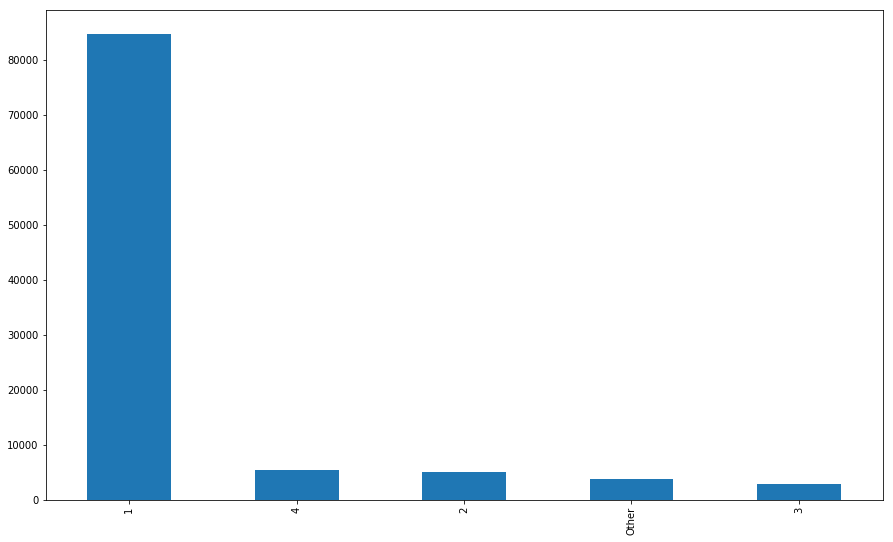

In [49]:
df3.plot(kind = 'bar')

## Missing values - treat as in paper

* weight, payor code, medical specialty :: missing value issues
<br>
<br>
'There were several features that could not be treated directly since they had a high percentage of missing values. These features were weight (97% values missing), payer code (40%), and medical specialty (47%). Weight attribute was considered to be too sparse and it was not included in further analysis. Payer code was removed since it had a high percentage of missing values and it was not considered relevant to the outcome. Medical specialty attribute was maintained, adding the value “missing” in order to account for missing values. '

In [50]:
df2.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesmed', 'readmitted',
       'encounter_group'],
      dtype='object')

In [51]:
# drop weight since rarely present
'Number of records with a weight value is {:,}'.format(df['weight'][df.weight.isnull()].size)

'Number of records with a weight value is 98,569'

In [52]:
# removing weight and payer code due to excessive missing values as in article
del df2['weight']
del df2['payer_code']

In [53]:
# view possible entries in the medical specialty field
df2['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [54]:
# sample how the medical specialty field is populated
df2['medical_specialty'].sample(30)

46986                       NaN
85771                       NaN
89951                       NaN
77167                       NaN
38638          InternalMedicine
70005          Emergency/Trauma
4044                        NaN
74286                       NaN
40175    Family/GeneralPractice
43257          Emergency/Trauma
77843          InternalMedicine
75978          Emergency/Trauma
37047                       NaN
20322          InternalMedicine
42082          InternalMedicine
75868                       NaN
94815                       NaN
41197          InternalMedicine
29847          InternalMedicine
75436          Surgery-Vascular
19850          InternalMedicine
22181          InternalMedicine
67591          Emergency/Trauma
66990                       NaN
43500                       NaN
49146                       NaN
25052                       NaN
26117                       NaN
14003                   Urology
94460                Cardiology
Name: medical_specialty, dtype: object

In [55]:
# view the top 5 most frequent medical specialty. Note that there are missing values.
df2[['encounter_id', 'medical_specialty']].groupby('medical_specialty').count().sort_values(by='encounter_id', ascending = False ).head(5)

,encounter_id
medical_specialty,
InternalMedicine,14635
Emergency/Trauma,7565
Family/GeneralPractice,7440
Cardiology,5352
Surgery-General,3099


## putting diagnoses into groups

In [56]:
# looking at formate of diag_1 results
df2['diag_1'].sample(21)

5072        715
83725       459
64194       414
88093       491
33156       443
82910       198
21929       414
93307       253
77634       428
47833       998
26837       491
78813       486
79008       995
97620       507
67284       218
77655    250.82
20587       428
73173       599
51832       491
78111       451
32853       486
Name: diag_1, dtype: object

In [57]:
match = re.match(r"([a-z]+)([0-9]+)", 'V57.8', re.I)
if match:
    items = match.groups()
    # items is ("foo", "21")

In [59]:
print(items)

('V', '57')


In [70]:
def split_text_num (row):
    match = re.match(r"([a-z]+)([0-9]+)", str(row) , re.I)
    if match:
        items = match.groups()
        return items
    return ''
    # items is ("foo", "21")
#print items

In [71]:
df2['diag_1_split'] =df2['diag_1'].apply(lambda row: split_text_num (row))
# df2['diag_1_split']



In [73]:
# strip out decimal points
numstring = str(115.555555)
num = float(numstring[:numstring.find('.')+1])
print(numstring, num)

115.555555 115.0


# changed function based on literal meaning of function, not sure if it's correct

In [90]:
def strip_decimals (row):
    try:
        start, end = 0, len(row)
        for ind in range(len(row)):
            if not start and row[ind].isdigit():
                start = ind
            if row[ind] == '.':
                end = ind
                break
        return int(float(row[start:end]))
    except:
        return int(float(row))
    finally:
        return row
   # return float(row[:row.find('.')+2])



In [91]:
df2['diag_1_stripped'] =df2['diag_1'].apply (lambda row: strip_decimals (row))

In [92]:
df2['diag_1'].value_counts()

428     6862
414     6581
786     4016
410     3614
486     3508
        ... 
V67        1
365        1
372        1
133        1
E909       1
Name: diag_1, Length: 716, dtype: int64

# <font color = red > Machine Learning Section

# Logistic Regression in Steps like in paper

In [ ]:
### feature matrix :: without a1c result

In [92]:
X_dummy = pd.get_dummies(x_undummy_indexed, prefix='f',dummy_na=True)

In [20]:
X_dummy.head(3)

NameError: name 'X_dummy' is not defined

### getting to single row for each member

In [19]:
X_dummy.groupby(X_dummy.index).sum().head()


NameError: name 'X_dummy' is not defined

In [102]:
x_grouped = X_dummy.groupby(X_dummy.index).sum()

In [103]:
type(x_grouped)

pandas.core.frame.DataFrame

In [97]:
flagger = lambda x: 1 if x>0 else 0

In [104]:
x_flat = x_grouped.applymap(flagger)

In [21]:
x_flat.sample(5)

NameError: name 'x_flat' is not defined

In [22]:
x_flat.describe()

NameError: name 'x_flat' is not defined

## target table

## imbalanced data

# Oversampling 

Adjust Xs and y.

In [23]:
# EXAMPLE
X_e, y_e = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print('Original dataset shape {}'.format(Counter(y)))
# Original dataset shape Counter({1: 900, 0: 100})
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X_e, y_e)
print('Resampled dataset shape {}'.format(Counter(y_res)))
# Resampled dataset shape Counter({0: 900, 1: 900})

NameError: name 'make_classification' is not defined

In [24]:
# actual

print('Original dataset shape {}'.format(Counter(y)))
# Original dataset shape Counter({1: 900, 0: 100})
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(Xs, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))
# Resampled dataset shape Counter({0: 900, 1: 900})

NameError: name 'Counter' is not defined

In [25]:
len(X_res), len(y_res)

NameError: name 'X_res' is not defined

### Classification with cross-validation

Initially, the support vector machines (SVMs) learning algorithm will be used to build the predictive model.

SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995).

Splitting the data into test and training sets is crucial to avoid overfitting and, therefore, allows you to generalize to real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we can specify so-called folds so that the data is divided into similarly-sized folds. Training occurs by taking all folds except one – referred to as the holdout sample. On the completion of the training, you test the performance of your fitted model using the holdout sample. The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample. Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample. The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.


In [276]:
# 5. Divide records in training and testing sets.
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.3, random_state=2, stratify=y_res)





In [278]:
# 6. Create an SVM classifier and train it on 70% of the data set.

start_time = timeit.default_timer()

clf = SVC(probability=True)
clf.fit(X_res_train, y_res_train)

elapsed_svm = timeit.default_timer() - start_time

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [281]:
# 7. Analyze accuracy of predictions on 30% of the holdout test sample.
start_time = timeit.default_timer()

classifier_score = clf.score(X_test, y_test)
print '\nThe classifier accuracy score is {:.2f}\n'.format(classifier_score)

elapsed_svm_score = timeit.default_timer() - start_time


The classifier accuracy score is 0.75



### k-fold cross validation

In [292]:
# Get average of 3-fold cross-validation score using an SVC estimator.
start_time = timeit.default_timer()

n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)

elapsed_svm_k_fold = timeit.default_timer() - start_time


The 3-fold cross-validation accuracy score for this classifier is 0.98



The above evaluations were based on using the entire set of features. You will now employ the correlation-based feature selection strategy to assess the effect of using 100 features which have the best correlation with the class labels.


### feature selection

In [293]:
start_time = timeit.default_timer()

clf2 = make_pipeline(SelectKBest(f_regression, k=100),
                    SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

elapsed_svm_feature_selection = timeit.default_timer() - start_time

In [294]:
start_time = timeit.default_timer()

print scores
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print "Average score and uncertainty: (%.2f +- %.3f)%%"%avg

elapsed_svm_feature_scores = timeit.default_timer() - start_time

[ 0.9823916   0.9823916   0.98239097]
Average score and uncertainty: (98.24 +- 0.000)%


### confusion matrix


~~~~
                        Model says "+"     Model says  "-"

      Actual: "+"       True positive   |   False negative
                      ----------------------------------
      Actual: "-"       False positive  |   True negative
  
~~~~



In [26]:
start_time = timeit.default_timer()

# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(cm)

elapsed_confusion_matrix = timeit.default_timer() - start_time

NameError: name 'timeit' is not defined

### ROC

In [27]:
# Plot the receiver operating characteristic curve (ROC).

start_time = timeit.default_timer()


plt.figure(figsize=(20,10))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print roc_auc, "roc_auc" # my addition
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

elapsed_roc_svm = timeit.default_timer() - start_time

NameError: name 'timeit' is not defined

## 3.1 Using other classifiers

The SVM classifier is only one of the classifiers that you have at your disposal. There are other classification methods implemented in Scikit-learn (as well as Mlxtend) that you can easily use. These include:

- Random forests with ``ensemble.RandomForestClassifier()``;
- Decision trees with ``tree.DecisionTreeClassifier()``;
- K-nearest neighbors with ``neighbors.KNeighborsClassifier()``;

- Perceptron (both gradient and stochastic gradient) with ``mlxtend.classifier.Perceptron``; and 
- Multilayer perceptron network (both gradient and stochastic gradient) with ``mlxtend.classifier.MultiLayerPerceptron``.

It is important to understand the underlying technique, as well as the corresponding implementation, in order to correctly interpret the output, or tune the estimator parameters. The following example illustrates the use of some of these classifiers on the data set, using the above-mentioned libraries.

### random forest

In [317]:
# Create an instance of random forest classifier, fit the data, and assess performance on test data.
start_time = timeit.default_timer()

clf_rf = ensemble.RandomForestClassifier(n_estimators=200,n_jobs=-1,max_depth=5 )    
n_folds = 10
cv_error = np.average(cross_val_score(clf_rf, 
                                      X_train, 
                                      y_train, 
                                      cv=n_folds))
clf_rf.fit(X_train, y_train)
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)

elapsed_random_forest = timeit.default_timer() - start_time


The 10-fold cross-validation accuracy score for this classifier is 0.98



### logistic regression classifier

In [301]:
# Create an instance of logistic regression classifier, fit the data, and assess performance on test data.
start_time = timeit.default_timer()

clf_logreg = linear_model.LogisticRegression(C=1e5)    
n_folds = 3
cv_error = np.average(cross_val_score(clf_logreg, 
                                      X_train, 
                                      y_train, 
                                      cv=n_folds))
clf_logreg.fit(X_train, y_train)
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error) 

elapsed_logistic_regression = timeit.default_timer() - start_time


The 3-fold cross-validation accuracy score for this classifier is 0.98



### decision tree

In [302]:
# Create an instance of decision tree classifier, fit the data, and assess performance on test data.
start_time = timeit.default_timer()

clf_tree = tree.DecisionTreeClassifier()
n_folds = 3
cv_error = np.average(cross_val_score(clf_tree, 
                                      X_train, 
                                      y_train, 
                                      cv=n_folds))
clf_tree = clf_tree.fit(X_train, y_train)
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)

elapsed_decision_tree = timeit.default_timer() - start_time


The 3-fold cross-validation accuracy score for this classifier is 0.97



### multilayer perceptron classifier (gradient descent)

In [303]:
# Create an instance of multilayer perceptron classifier (gradient descent), fit the data, and assess performance on test data.
start_time = timeit.default_timer()

clf_nn1 = MLP(hidden_layers=[40],l2=0.00,l1=0.0,epochs=150,eta=0.05,momentum=0.1,decrease_const=0.0,minibatches=1,random_seed=1,print_progress=3)
clf_nn1 = clf_nn1.fit(X_train, y_train)
clf_nn1.score(X_test, y_test)

elapsed_multilayer_perceptron_classifier_gradient_descent = timeit.default_timer() - start_time


IndexError: indices are out-of-bounds

### multilayer perceptron classifier (stochastic gradient descent)

In [304]:
# Create an instance of multilayer perceptron classifier (stochastic gradient descent), fit the data, and assess performance on test data.
start_time = timeit.default_timer()

clf_nn2 = MLP(hidden_layers=[40],l2=0.00,l1=0.0,epochs=50,eta=0.05,momentum=0.1,decrease_const=0.0,minibatches=len(y_train),random_seed=1,print_progress=3)
clf_nn2 = clf_nn2.fit(X_train, y_train)
clf_nn2.score(X_test, y_test)

elapsed_multilayer_perceptron_classifier_stochastic_gradient_descent = timeit.default_timer() - start_time

IndexError: indices are out-of-bounds

# Plot ROCs

In [311]:
from matplotlib.backends.backend_pdf import PdfPages

In [28]:
# Plot the results.
start_time = timeit.default_timer()

colors = ['b', 'g', 'r','c','m','k','y']
classifiers = ['svm','random_forest', 'logistic regression', 'decision tree', 'mlp_gd', 'mlp_sgd']
plt.figure(figsize=(20,10))
for i, cl in enumerate([clf, clf_rf, clf_logreg, clf_tree,clf_nn1, clf_nn2]):
    probas_ = cl.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=classifiers[i]+' (AUC = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], '--', color=colors[i], label='Random (AUC = 0.50)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)
plt.legend(loc="lower right")


elapsed_ROCs = timeit.default_timer() - start_time

NameError: name 'timeit' is not defined

In [310]:
#print elapsed_svm, 'elapsed_svm'
# print elapsed_svm_score, 'elapsed_svm_score'
print elapsed_svm_k_fold,  'elapsed_svm_k_fold'
print elapsed_svm_feature_selection, 'elapsed_svm_feature_selection'
print elapsed_svm_feature_scores, 'elapsed_svm_feature_scores'
print elapsed_confusion_matrix, 'elapsed_confusion_matrix'
print elapsed_roc_svm, 'elapsed_ROC_svm'
print elapsed_random_forest, 'elapsed_random_forest'
print elapsed_logistic_regression, 'elapsed_logistic_regression'
print elapsed_decision_tree, 'elapsed_decision_tree'
#print elapsed_multilayer_perceptron_classifier_gradient_descent, 'elapsed_multilayer_perceptron_classifier_gradient_descent'
#print elapsed_multilayer_perceptron_classifier_stochastic_gradient_descent, 'elapsed_multilayer_perceptron_classifier_stochastic_gradient_descent'
print elapsed_ROCs, 'elapsed_ROCs'

1166.46323129 elapsed_svm_k_fold
1816.57242757 elapsed_svm_feature_selection
0.00305814007061 elapsed_svm_feature_scores
2223.751169 elapsed_confusion_matrix
47.5602071632 elapsed_ROC_svm
17.6241884793 elapsed_random_forest
10.4753598572 elapsed_logistic_regression
39.9617342428 elapsed_decision_tree
48.5518959114 elapsed_ROCs


In [315]:
#print elapsed_svm, 'elapsed_svm'
# print elapsed_svm_score, 'elapsed_svm_score'
print elapsed_svm_k_fold/60.0,  'minutes elapsed_svm_k_fold'
print elapsed_svm_feature_selection/60.0, 'minutes elapsed_svm_feature_selection'
print elapsed_svm_feature_scores/60.0, 'minutes elapsed_svm_feature_scores'
print elapsed_confusion_matrix/60.0, 'minutes elapsed_confusion_matrix'
print elapsed_roc_svm/60.0, 'minutes elapsed_ROC_svm'
print elapsed_random_forest/60.0, 'minutes elapsed_random_forest'
print elapsed_logistic_regression/60.0, 'minutes elapsed_logistic_regression'
print elapsed_decision_tree/60.0, 'minutes elapsed_decision_tree'
#print elapsed_multilayer_perceptron_classifier_gradient_descent, 'elapsed_multilayer_perceptron_classifier_gradient_descent'
#print elapsed_multilayer_perceptron_classifier_stochastic_gradient_descent, 'elapsed_multilayer_perceptron_classifier_stochastic_gradient_descent'
print elapsed_ROCs/60.0, 'minutes elapsed_ROCs'

19.4410538548 minutes elapsed_svm_k_fold
30.2762071262 minutes elapsed_svm_feature_selection
5.09690011768e-05 minutes elapsed_svm_feature_scores
37.0625194834 minutes elapsed_confusion_matrix
0.792670119387 minutes elapsed_ROC_svm
0.293736474654 minutes elapsed_random_forest
0.174589330953 minutes elapsed_logistic_regression
0.666028904046 minutes elapsed_decision_tree
0.799623366936 minutes elapsed_ROCs


### <font color='orange'>8. What else? <a id="else"></a></font>